## Problem Statement

The following data contains information about customers of a bank. Build a Machine Learning model to predict whether a customer is eligibile to apply for a loan or not

In [1]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing modules
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

# Saving the model
import pickle

In [2]:
data = pd.read_csv('loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df = data.copy()
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Dropping the unique identifying feature: Loan_ID

In [6]:
df.drop(['Loan_ID'], axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

### 1. Checking for Multi-collinearity

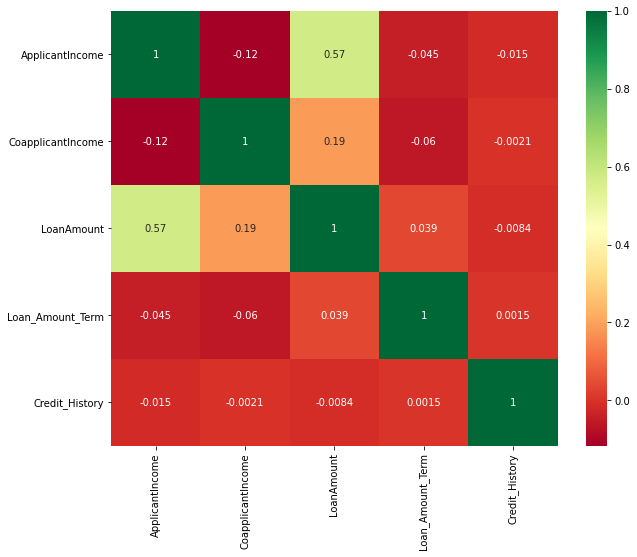

In [7]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### There isn't enough correlation among the input features in order to drop any of them

### 2. Checking for Missing Values

In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### There are a lot of missing values present within the dataset

### 3. Checking for the presence of Outliers

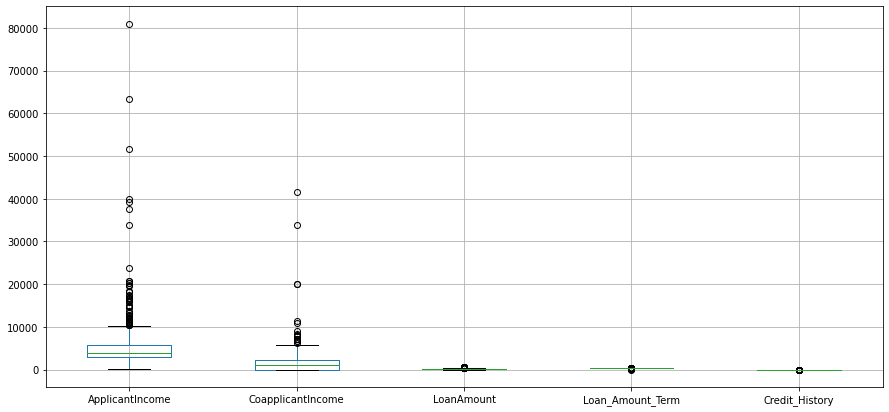

In [9]:
plt.figure(figsize=(15, 7))

df.boxplot()
plt.show()

### Features with outliers:

1. ApplicantIncome

2. CoapplicantIncome

### Checking the 'Dependent' feature

In [10]:
# The 'Dependents' feature contains string values with one values: 3+
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

## Plan for Preprocessing the data

A] For Outliers ==> Will create a Custom Transformer to handle the outliers

B] Handling Missing Values:

1. LoanAmount == Mean

2. Gender == Mode

3. Married == Mode

4. Dependents == Mode

5. Self_Employed == Mode

6. Loan_Amount_Term == Mode

7. Credit_History == Mode

C] One Hot Encoding Categorical Features: 

## X & y Split

In [11]:
X = df.drop(['Loan_Status'], axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [12]:
y = df['Loan_Status']
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train.shape, X_test.shape

((411, 11), (203, 11))

### Dealing with the 'Dependents' feature

In [15]:
X_train['Dependents'].head()

244    0
393    2
310    0
408    1
572    2
Name: Dependents, dtype: object

In [16]:
dep_map = {
    '0':0,
    '1':1,
    '2':2,
    '3+':3
}

In [17]:
X_train['Dependents'] = X_train['Dependents'].map(dep_map)

E:\My ML Projects\mlprojects\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [18]:
X_train['Dependents'].head()

244    0.0
393    2.0
310    0.0
408    1.0
572    2.0
Name: Dependents, dtype: float64

### Building the Preprocessing Pipeline for Handling Outliers & Missing Values

In [19]:
outliers_features = ['ApplicantIncome', 'CoapplicantIncome']

mean_features = ['LoanAmount']

mode_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

### Creating a Custom Transformer to handle Outliers

In [20]:
# My custom Transformer to handle the Outliers

from sklearn.base import TransformerMixin
import pandas as pd
pd.options.mode.chained_assignment = None  # To ignore the warning for not returning a copied DataFrame

class HandleOutliers(TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):

        from scipy.stats import shapiro

        for col in X.columns : # Looping through all columns within the given DataFrame
            
            # If p-value < 0.05 == Skewed Distribution, else Normal Distribution
            
            if shapiro(X[col]).pvalue < 0.05 :

                # IQR method to handle outliers with Skewed Distribution
                q1 = X[col].quantile(0.25)
                q3 = X[col].quantile(0.75)

                iqr = q3 - q1

                lower_boundary = q1 - 1.5 * q1
                upper_boundary = q3 + 1.5 * q3

                X.loc[X[col] <= lower_boundary, col] = lower_boundary
                X.loc[X[col] >= upper_boundary, col] = upper_boundary

                
            else :

                # 3-Sigma method to handle outliers with Normal Distribution
                lower_boundary = X[col].mean() - 3 * X[col].std()
                upper_boundary = X[col].mean() + 3 * X[col].std()

                X.loc[X[col] <= lower_boundary, col] = lower_boundary
                X.loc[X[col] >= upper_boundary, col] = upper_boundary
                
        return X

In [21]:
outliers_pipe = Pipeline([
    ('Outliers', HandleOutliers())
])

mean_pipe = Pipeline([
    ('Mean_Imputer', SimpleImputer(missing_values=np.nan, strategy='mean'))
])

mode_pipe = Pipeline([
    ('Mode_Imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

In [22]:
preprocess_pipe = ColumnTransformer([
    ('Handle_Outliers', outliers_pipe, outliers_features),
    ('Impute_Mean', mean_pipe, mean_features),
    ('Impute_Mode', mode_pipe, mode_features)
], remainder='passthrough')

In [23]:
X_train_preprocessed = preprocess_pipe.fit_transform(X_train)

In [24]:
X_train_preprocessed

array([[3406.0, 4417.0, 123.0, ..., 1.0, 'Not Graduate', 'Semiurban'],
       [1993.0, 1625.0, 113.0, ..., 1.0, 'Not Graduate', 'Semiurban'],
       [2917.0, 0.0, 84.0, ..., 1.0, 'Graduate', 'Semiurban'],
       ...,
       [3237.0, 0.0, 30.0, ..., 1.0, 'Graduate', 'Urban'],
       [10047.0, 0.0, 147.16919191919192, ..., 1.0, 'Graduate',
        'Semiurban'],
       [13650.0, 0.0, 147.16919191919192, ..., 1.0, 'Graduate', 'Urban']],
      dtype=object)

In [25]:
X_train_preprocessed.shape

(411, 11)

In [26]:
X_train_preprocessed[0]

array([3406.0, 4417.0, 123.0, 'Male', 'Yes', 0.0, 'No', 360.0, 1.0,
       'Not Graduate', 'Semiurban'], dtype=object)

In [27]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
244,Male,Yes,0.0,Not Graduate,No,3406,4417.0,123.0,360.0,1.0,Semiurban
393,Male,Yes,2.0,Not Graduate,No,1993,1625.0,113.0,180.0,1.0,Semiurban
310,Female,No,0.0,Graduate,No,2917,0.0,84.0,360.0,1.0,Semiurban
408,Male,Yes,1.0,Graduate,No,8300,0.0,152.0,300.0,0.0,Semiurban
572,Male,Yes,2.0,Graduate,No,16666,0.0,275.0,360.0,1.0,Urban


In [28]:
X_train.shape

(411, 11)

In [29]:
cols = outliers_features+mean_features+mode_features+['Education', 'Property_Area']

In [30]:
len(cols)

11

In [31]:
X_train = pd.DataFrame(X_train_preprocessed, columns=cols)

In [32]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Self_Employed,Loan_Amount_Term,Credit_History,Education,Property_Area
0,3406.0,4417.0,123.0,Male,Yes,0.0,No,360.0,1.0,Not Graduate,Semiurban
1,1993.0,1625.0,113.0,Male,Yes,2.0,No,180.0,1.0,Not Graduate,Semiurban
2,2917.0,0.0,84.0,Female,No,0.0,No,360.0,1.0,Graduate,Semiurban
3,8300.0,0.0,152.0,Male,Yes,1.0,No,300.0,0.0,Graduate,Semiurban
4,14870.0,0.0,275.0,Male,Yes,2.0,No,360.0,1.0,Graduate,Urban


In [33]:
X_train.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Gender               0
Married              0
Dependents           0
Self_Employed        0
Loan_Amount_Term     0
Credit_History       0
Education            0
Property_Area        0
dtype: int64

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ApplicantIncome    411 non-null    object
 1   CoapplicantIncome  411 non-null    object
 2   LoanAmount         411 non-null    object
 3   Gender             411 non-null    object
 4   Married            411 non-null    object
 5   Dependents         411 non-null    object
 6   Self_Employed      411 non-null    object
 7   Loan_Amount_Term   411 non-null    object
 8   Credit_History     411 non-null    object
 9   Education          411 non-null    object
 10  Property_Area      411 non-null    object
dtypes: object(11)
memory usage: 35.4+ KB


In [35]:
# Converting 'object' to 'float32'
to_int = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Credit_History']

for col in X_train.columns:
    if col in to_int:
        X_train[col] = X_train[col].astype(np.float32)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    411 non-null    float32
 1   CoapplicantIncome  411 non-null    float32
 2   LoanAmount         411 non-null    float32
 3   Gender             411 non-null    object 
 4   Married            411 non-null    object 
 5   Dependents         411 non-null    float32
 6   Self_Employed      411 non-null    object 
 7   Loan_Amount_Term   411 non-null    float32
 8   Credit_History     411 non-null    float32
 9   Education          411 non-null    object 
 10  Property_Area      411 non-null    object 
dtypes: float32(6), object(5)
memory usage: 25.8+ KB


### One Hot Encoding

In [37]:
# Appending all the features with dtype == 'object' (Categorical Features) in a list
cat_features = []

for col in X_train.columns :
    if X_train[col].dtype == 'object' :
        cat_features.append(col)
        
cat_features

['Gender', 'Married', 'Self_Employed', 'Education', 'Property_Area']

In [38]:
for col in X_train.columns:
    if col in cat_features:
        print(X_train[col].unique())

['Male' 'Female']
['Yes' 'No']
['No' 'Yes']
['Not Graduate' 'Graduate']
['Semiurban' 'Urban' 'Rural']


In [39]:
dummies_gender = pd.get_dummies(X_train['Gender'], drop_first=True)
dummies_married = pd.get_dummies(X_train['Married'], prefix = 'Married', drop_first=True)
dummies_self_emp = pd.get_dummies(X_train['Self_Employed'], prefix = 'Self_Employed', drop_first=True)
dummies_edu = pd.get_dummies(X_train['Education'], drop_first=True)
dummies_prop = pd.get_dummies(X_train['Property_Area'], drop_first=True)

In [40]:
encode_df = pd.concat([dummies_gender, dummies_married, dummies_self_emp, dummies_edu, dummies_prop], axis=1)
encode_df.head()

,Male,Married_Yes,Self_Employed_Yes,Not Graduate,Semiurban,Urban
0,1,1,0,1,1,0
1,1,1,0,1,1,0
2,0,0,0,0,1,0
3,1,1,0,0,1,0
4,1,1,0,0,0,1


In [41]:
X_train.drop(cat_features, axis=1, inplace=True)

In [42]:
X_train = pd.concat([X_train, encode_df], axis=1)
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Dependents,Loan_Amount_Term,Credit_History,Male,Married_Yes,Self_Employed_Yes,Not Graduate,Semiurban,Urban
0,3406.0,4417.0,123.0,0.0,360.0,1.0,1,1,0,1,1,0
1,1993.0,1625.0,113.0,2.0,180.0,1.0,1,1,0,1,1,0
2,2917.0,0.0,84.0,0.0,360.0,1.0,0,0,0,0,1,0
3,8300.0,0.0,152.0,1.0,300.0,0.0,1,1,0,0,1,0
4,14870.0,0.0,275.0,2.0,360.0,1.0,1,1,0,0,0,1


In [43]:
# Conventioning for simplicity
X_train['Not_Graduate'] = X_train['Not Graduate']
X_train.drop(['Not Graduate'], axis=1, inplace=True)

In [44]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Dependents,Loan_Amount_Term,Credit_History,Male,Married_Yes,Self_Employed_Yes,Semiurban,Urban,Not_Graduate
0,3406.0,4417.0,123.0,0.0,360.0,1.0,1,1,0,1,0,1
1,1993.0,1625.0,113.0,2.0,180.0,1.0,1,1,0,1,0,1
2,2917.0,0.0,84.0,0.0,360.0,1.0,0,0,0,1,0,0
3,8300.0,0.0,152.0,1.0,300.0,0.0,1,1,0,1,0,0
4,14870.0,0.0,275.0,2.0,360.0,1.0,1,1,0,0,1,0


## Preprocessing the Test Data separately

In [45]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
377,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban
163,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
132,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban


In [46]:
X_test.shape

(203, 11)

In [47]:
X_test['Dependents'] = X_test['Dependents'].map(dep_map)

# Using transform method for Test Data
X_test_preprocessed = preprocess_pipe.transform(X_test)

X_test = pd.DataFrame(X_test_preprocessed, columns=cols)

dummies_gender = pd.get_dummies(X_test['Gender'], drop_first=True)
dummies_married = pd.get_dummies(X_test['Married'], prefix = 'Married', drop_first=True)
dummies_self_emp = pd.get_dummies(X_test['Self_Employed'], prefix = 'Self_Employed', drop_first=True)
dummies_edu = pd.get_dummies(X_test['Education'], drop_first=True)
dummies_prop = pd.get_dummies(X_test['Property_Area'], drop_first=True)

encode_df = pd.concat([dummies_gender, dummies_married, dummies_self_emp, dummies_edu, dummies_prop], axis=1)

X_test.drop(cat_features, axis=1, inplace=True)

X_test = pd.concat([X_test, encode_df], axis=1)

X_test['Not_Graduate'] = X_test['Not Graduate']

X_test.drop(['Not Graduate'], axis=1, inplace=True)

In [48]:
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Dependents,Loan_Amount_Term,Credit_History,Male,Married_Yes,Self_Employed_Yes,Semiurban,Urban,Not_Graduate
0,9083.0,0.0,228.0,0.0,360.0,1.0,1,1,0,1,0,0
1,4310.0,0.0,130.0,0.0,360.0,1.0,1,1,0,1,0,0
2,4167.0,1447.0,158.0,2.0,360.0,1.0,1,1,0,0,0,0
3,2900.0,0.0,71.0,0.0,360.0,1.0,0,0,0,0,0,0
4,2718.0,0.0,70.0,0.0,360.0,1.0,1,0,0,1,0,0


## Target Mappings

In [49]:
y_train.unique()

array(['Y', 'N'], dtype=object)

In [50]:
y_map = {
    'N':0,
    'Y':1
}

In [51]:
y_train = y_train.map(y_map)

In [52]:
y_test = y_test.map(y_map)

## Model Bulding

### 1. RandomForest Model

In [53]:
rf = RandomForestClassifier()

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
rf.score(X_test, y_test)

0.7832512315270936

### 2. AdaBoost Model

In [56]:
ad = AdaBoostClassifier()

In [57]:
ad.fit(X_train, y_train)

AdaBoostClassifier()

In [58]:
ad.score(X_test, y_test)

0.7832512315270936

## Tuning the Hyperparameters of AdaBoost Model

In [60]:
params = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5, 0.9, 1],
    'n_estimators': [10, 25, 30, 50, 70, 100]
}

In [61]:
rs_cv = RandomizedSearchCV(ad, params, cv=5, n_iter=8)

In [62]:
best_model = rs_cv.fit(X_train, y_train)

In [63]:
best_model.score(X_test, y_test)

0.7980295566502463

In [64]:
best_model.best_estimator_

AdaBoostClassifier(learning_rate=0.05)

## Model Performance

In [65]:
y_pred = best_model.predict(X_test)

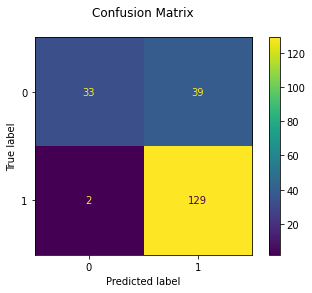

In [66]:
plot_confusion_matrix(best_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [67]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.46      0.62        72
           1       0.77      0.98      0.86       131

    accuracy                           0.80       203
   macro avg       0.86      0.72      0.74       203
weighted avg       0.83      0.80      0.78       203



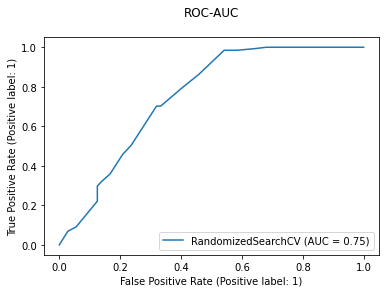

In [68]:
plot_roc_curve(best_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

## Saving (Dumping) the model

In [75]:
# open a file, where you want to store the data
file = open('loan_eligibility_adaboost.pkl', 'wb')

# dump information to that file
pickle.dump(best_model, file)

In [76]:
model = open('loan_eligibility_adaboost.pkl', 'rb')

## Predictions

In [71]:
X_test.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Dependents,Loan_Amount_Term,Credit_History,Male,Married_Yes,Self_Employed_Yes,Semiurban,Urban,Not_Graduate
198,4053.0,2426.0,158.0,1.0,360.0,0.0,1,0,1,0,1,1
199,3125.0,2583.0,170.0,1.0,360.0,1.0,1,1,0,1,0,0
200,4583.0,0.0,133.0,0.0,360.0,0.0,0,0,1,1,0,0
201,3326.0,913.0,105.0,1.0,84.0,1.0,0,1,0,1,0,0
202,1958.0,1456.0,60.0,2.0,300.0,1.0,1,1,0,0,1,1


In [72]:
y_test.tail()

280    0
195    0
613    0
495    1
451    1
Name: Loan_Status, dtype: int64

In [73]:
best_model.predict([[4053.0,2426.0,158,1,360,0,1,0,1,0,1,1]])

array([0], dtype=int64)

In [74]:
best_model.predict([[1958.0,1456.0,60,2,300,1,1,1,0,0,1,1]])

array([1], dtype=int64)